# TP 1: Intraday curves and relationships between daily variables

The aim of this tutorial is to familiarize you with the `Pandas` library and databases.

You will begin by constructing average intraday curves for certain market indicators such as volume, number of trades, turnover, volatility, spread, imbalance and liquidity available at best bid and best ask.

You will then study the relationships between certain daily indicators, such as the links between volume and number of trades, turnover and number of trades, and spread and volatility per trade.

## I. Importing and reading data

You have 10 databases in `DataFrame` format from `Pandas`, one for each asset on 3 different stock exchanges:
* Paris**: Bouygues, LVMH, Sanofi and Total;
* Nasdaq**: Amazon, Apple, Google;
* Tokyo**: Canon, Panasonic and Sony.

You'll need to import the classic Python libraries: `NumPy`, `Pandas`, `MatPlotLib` and `DateTime` to manage dates/times.

Each `DataFrame` presents all transactions for the year 2011 for the asset and has the same format:
* the `Time` index is the transaction timestamp;
* the `TradedPrice` column represents the average price per share of the transaction;
* the `TradedQty` column represents the transaction volume;
* the `BidPrice` column represents the best bid price just prior to the transaction;
* the `AskPrice` column represents the best ask price just before the transaction;
* the `BidQty` column represents the best bid volume just before the transaction;
* the `AskQty` column represents the best ask volume just before the transaction;
* the `TradedSign` column represents the sign of the transaction (negative for bid and positive for ask).

The `Time` index of the time series is in Python's `DateTime` format. You can therefore extract not only dates, but also years, months, days, hours, minutes, etc.

In [ ]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

diction = {'Paris':['BOUYGUES','LVMH','SANOFI','TOTAL'],
           'Nasdaq':['AMAZON','APPLE','GOOGLE'],
           'Tokyo':['CANON','PANASONIC','SONY']}
Paris, Nasdaq, Tokyo = dict(), dict(), dict()

for name in diction.keys():
    if name == 'Paris':
        for firm in diction[name]:
            Paris[firm] = pd.read_hdf(f'{firm}.h5')
    if name == 'Nasdaq':
        for firm in diction[name]:
            Nasdaq[firm] = pd.read_hdf(f'{firm}.h5')
    if name == 'Tokyo':
        for firm in diction[name]:
            Tokyo[firm] = pd.read_hdf(f'{firm}.h5')

## II. Courbes intraday de différents indicateurs

You'll need to draw up intraday curves averaged over the year in 5-minute increments in percentage terms (to compare assets), and make a graph for each stock market with the 3 or 4 assets of each. You will then comment on the results obtained for each curve (curve shape, peaks, etc.).

You can use the `resample` function in `Pandas`, which lets you resample to the desired frequency and calculate statistics at that frequency (such as sum, mean, variance, minimum, maximum, etc.).

### 1. Courbes de volume

<Axes: title={'center': 'Average Volume Percentage Traded through the day in Paris'}, xlabel='Hour', ylabel='Volume Percentage'>

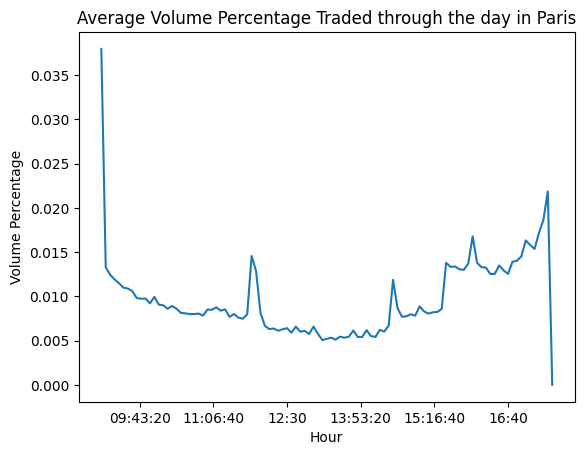

In [ ]:
Volume_PARIS = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
Volume_PARIS['Hour'] = Volume_PARIS.index.time

Volume_Paris = Volume_PARIS.groupby('Hour')['TradedQty'].mean()
Volume_Paris = Volume_Paris[Volume_Paris>0]

Paris_Volume_Norm = Volume_Paris/np.sum(Volume_Paris)
plt.xlabel('Hour')
plt.ylabel('Volume Percentage')
plt.title('Average Volume Percentage Traded through the day in Paris')
Paris_Volume_Norm.plot()

<Axes: title={'center': 'Average Volume Percentage Traded through the day in Nasdaq'}, xlabel='Hour', ylabel='Volume Percentage'>

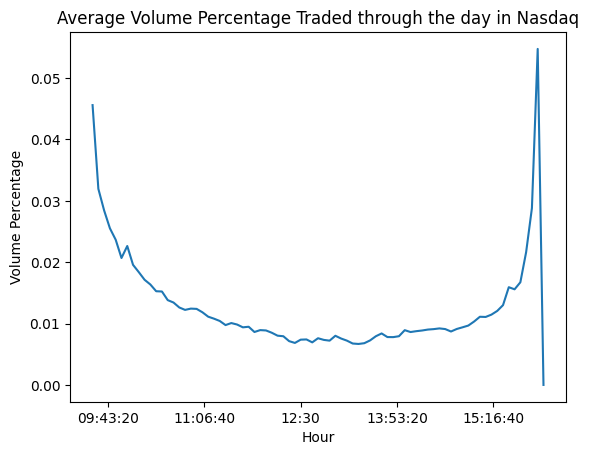

In [ ]:
VOLUME_Nasdaq = Nasdaq['APPLE'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()+Nasdaq['AMAZON'].resample('5min').sum()
VOLUME_Nasdaq['Hour'] = VOLUME_Nasdaq.index.time

Volume_Nasdaq = VOLUME_Nasdaq.groupby('Hour')['TradedQty'].mean()
Volume_Nasdaq = Volume_Nasdaq[Volume_Nasdaq>0]

Nasdaq_Volume_Norm = Volume_Nasdaq/np.sum(Volume_Nasdaq)

plt.xlabel('Hour')
plt.ylabel('Volume Percentage')
plt.title('Average Volume Percentage Traded through the day in Nasdaq')
Nasdaq_Volume_Norm.plot()

<Axes: title={'center': 'Average Volume Percentage Traded through the day in Tokyo'}, xlabel='Hour', ylabel='Volume Percentage'>

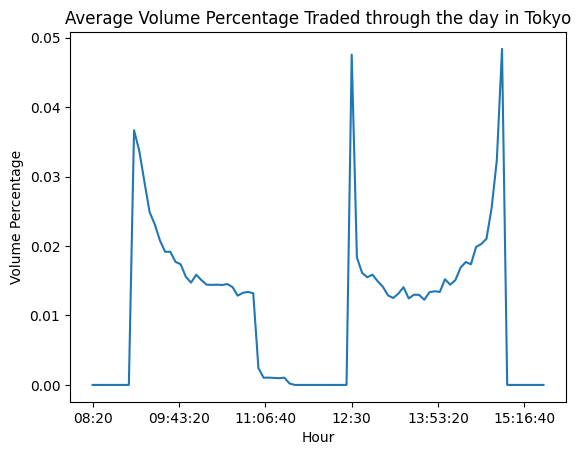

In [ ]:
VOLUME_Tokyo = Tokyo['SONY'].resample('5min').sum()+Tokyo['PANASONIC'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()
VOLUME_Tokyo['Hour'] = VOLUME_Tokyo.index.time

Volume_Tokyo = VOLUME_Tokyo.groupby('Hour')['TradedQty'].mean()

Tokyo_Volume_Norm = Volume_Tokyo/np.sum(Volume_Tokyo)

plt.xlabel('Hour')
plt.ylabel('Volume Percentage')
plt.title('Average Volume Percentage Traded through the day in Tokyo')
Tokyo_Volume_Norm[100:-100].plot()

# **Comments**

We can see the stylized facts seen during the lesson. With spikes at opening of other markets and at their closures.

At the opening of the market, agents start taking positions, e.g. 9am for Paris, 3.30pm (Paris time) for Nasdaq and 1am (Paris time) for Tokyo. When the markets close, agents must close their positions. What makes Tokyo different from the other two is that it takes a lunch break. We can also see on the 3 graphs a kind of smile with Paris also exibiting 3 volume peaks. What's more, there's no significant increase in volumes traded on the Tokyo Stock Exchange before the morning close.

The intraday volume curves exhibit a U-shaped pattern across all three stock exchanges, with notable spikes occurring at the beginning and end of each trading day. These spikes correspond to the opening and closing of the markets, reflecting increased trading activity as market participants adjust their positions and react to overnight developments.

Moreover, there are distinct spikes in volume at the opening and closure of other markets, indicating cross-market interactions and the impact of global market dynamics on local trading behavior. For instance, on the Paris Stock Exchange, there are spikes at the opening of the Nasdaq and Tokyo Stock Exchanges, corresponding to 3:30 PM Paris time and 1:00 AM Paris time respectively. Similarly, spikes are observed on the Nasdaq and Tokyo volume curves at the opening of the Paris Stock Exchange at 9:00 AM Paris time. These spikes signify the influx of trading activity as investors react to developments in other markets and adjust their positions accordingly.

Overall, the U-shaped pattern, along with spikes at market openings and closures, highlight the cyclical nature of intraday trading behavior and the interconnectedness of global financial markets.

### 2. Number of trades curves

<Axes: title={'center': 'Paris Number of Trades percentage through day'}, xlabel='Hour'>

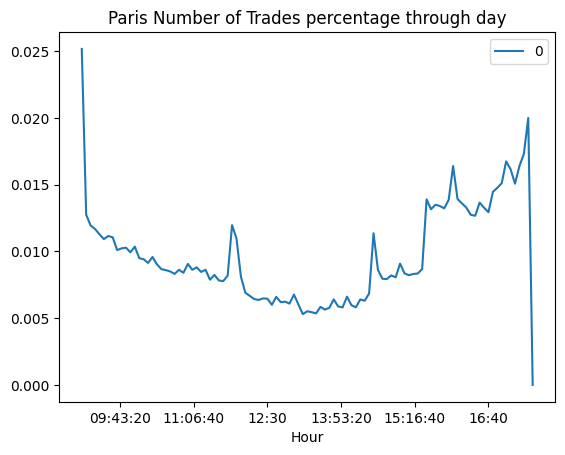

In [ ]:
Num_Trades_Paris = pd.DataFrame(Paris['BOUYGUES'].resample('5min').size()+Paris['LVMH'].resample('5min').size()+Paris['SANOFI'].resample('5min').size()+Paris['TOTAL'].resample('5min').size())
Num_Trades_Paris['Hour'] = Num_Trades_Paris.index.time

Day_Trades_Paris = Num_Trades_Paris.groupby('Hour').sum()
Day_Trades_Paris = Day_Trades_Paris[Day_Trades_Paris > 0]

NUM_Trades_Paris_Norm = Day_Trades_Paris/np.sum(Day_Trades_Paris)

NUM_Trades_Paris_Norm.plot(title = 'Paris Number of Trades percentage through day')

<Axes: title={'center': 'Nasdaq Number of Trades percentage through day'}, xlabel='Hour'>

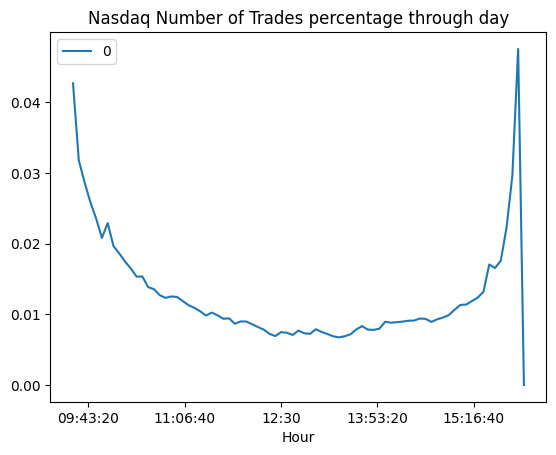

In [ ]:
Num_Trades_Nasdaq = pd.DataFrame(Nasdaq['AMAZON'].resample('5min').size()+Nasdaq['APPLE'].resample('5min').size()+Nasdaq['GOOGLE'].resample('5min').size())
Num_Trades_Nasdaq['Hour'] = Num_Trades_Nasdaq.index.time

Day_Trades_Nasdaq = Num_Trades_Nasdaq.groupby('Hour').sum()
Day_Trades_Nasdaq = Day_Trades_Nasdaq[Day_Trades_Nasdaq > 0]

NUM_Trades_Nasdaq_Norm = Day_Trades_Nasdaq/np.sum(Day_Trades_Nasdaq)

NUM_Trades_Nasdaq_Norm.plot(title = 'Nasdaq Number of Trades percentage through day')

<Axes: title={'center': 'Tokyo Number of Trades percentage through day'}, xlabel='Hour'>

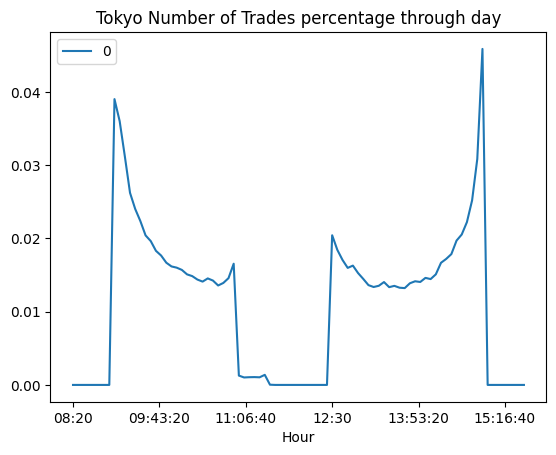

In [ ]:
Num_Trades_Tokyo = pd.DataFrame(Tokyo['CANON'].resample('5min').size()+Tokyo['PANASONIC'].resample('5min').size()+Tokyo['SONY'].resample('5min').size())
Num_Trades_Tokyo['Hour'] = Num_Trades_Tokyo.index.time

Day_Trades_Tokyo = Num_Trades_Tokyo.groupby('Hour').sum()

NUM_Trades_Tokyo_Norm = Day_Trades_Tokyo/np.sum(Day_Trades_Tokyo)

NUM_Trades_Tokyo_Norm[100:-100].plot(title = 'Tokyo Number of Trades percentage through day')

**Commentaires.**

The number of trades curves exhibit a similar U-shaped pattern across all three stock exchanges, mirroring the observations seen in the volume curves. Just like with volume, there are notable spikes at the beginning and end of each trading day, indicative of heightened trading activity during market openings and closures.

Furthermore, similar to the volume curves, there are distinct spikes in the number of trades at the opening and closure of other markets, demonstrating the interconnectedness of global financial markets and the impact of cross-market dynamics on local trading behavior. These spikes coincide with the opening and closing times of other major stock exchanges, reflecting the influx of trading activity as investors react to developments in different time zones.


### 3. Turnover curves (cash)

Price*Volume

<Axes: title={'center': 'Paris turnover percentage through day'}, xlabel='Hour'>

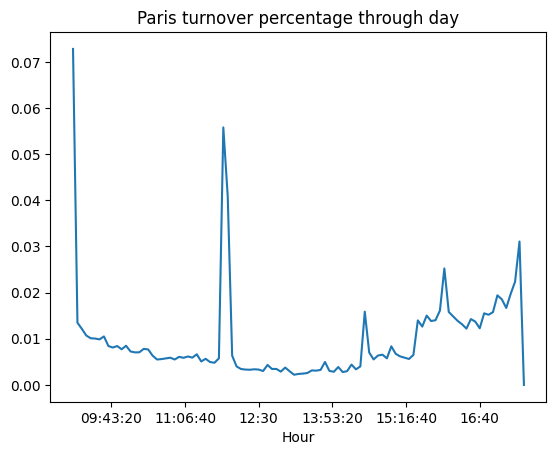

In [ ]:
df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris['Hour'] = df_Paris.index.time

df_Paris['Turnover'] = df_Paris['TradedQty']*df_Paris['TradedPrice']

turnover = df_Paris.groupby('Hour')['Turnover'].sum()
turnover = turnover[turnover > 0]

turnover = turnover/np.sum(turnover)
turnover.plot(title="Paris turnover percentage through day")

<Axes: title={'center': 'Nasdaq turnover percentage through day'}, xlabel='Hour'>

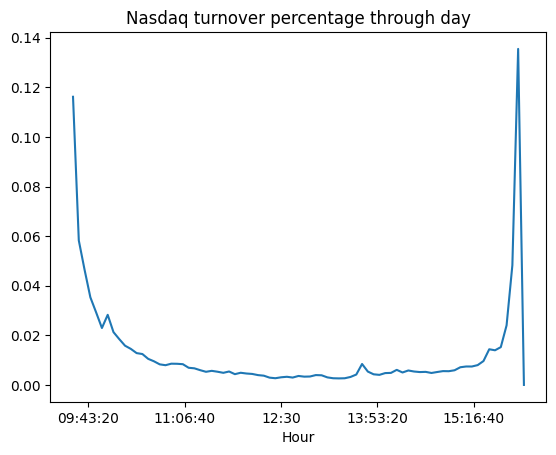

In [ ]:
df_Nasdaq = Nasdaq['AMAZON'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()+Nasdaq['APPLE'].resample('5min').sum()
df_Nasdaq['Hour'] = df_Nasdaq.index.time

df_Nasdaq['Turnover'] = df_Nasdaq['TradedQty']*df_Nasdaq['TradedPrice']

turnover = df_Nasdaq.groupby('Hour')['Turnover'].sum()
turnover = turnover[turnover > 0]

turnover = turnover/np.sum(turnover)
turnover.plot(title="Nasdaq turnover percentage through day")

<Axes: title={'center': 'Tokyo turnover percentage through day'}, xlabel='Hour'>

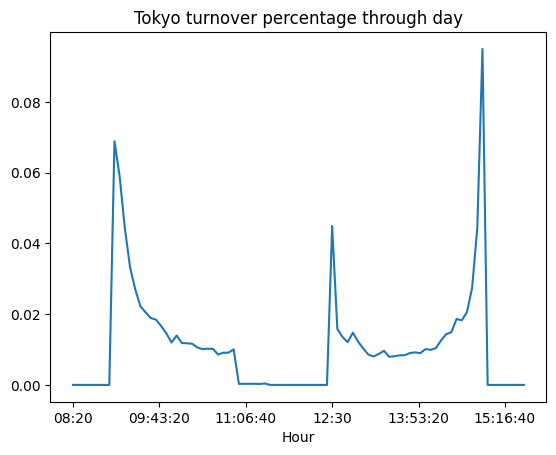

In [ ]:
df_Tokyo = Tokyo['PANASONIC'].resample('5min').sum()+Tokyo['SONY'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()
df_Tokyo['Hour'] = df_Tokyo.index.time

df_Tokyo['Turnover'] = df_Tokyo['TradedQty']*df_Tokyo['TradedPrice']

turnover = df_Tokyo.groupby('Hour')['Turnover'].sum()
#turnover = turnover[turnover > 0]

turnover = turnover/np.sum(turnover)
turnover[100:-100].plot(title="Tokyo turnover percentage through day")

**Commentaires.**

The turnover curves, which represent the value of all transactions in terms of cash, exhibit a pattern similar to the previous indicators. Across all three stock exchanges, the turnover curves display a U-shaped pattern, with spikes occurring at the beginning and end of each trading day.

In particular, the Paris turnover curve showcases pronounced spikes, consistent with the observations made in the volume and number of trades curves. These spikes correspond to the opening and closing of the Paris Stock Exchange and reflect heightened trading activity during these periods.

Similarly, the turnover curves for the Nasdaq and Tokyo Stock Exchanges display similar patterns, with spikes at market openings and closures. These spikes indicate increased trading activity as market participants adjust their positions and react to developments in global financial markets.



### 4. Average spread curves

<Axes: title={'center': 'Paris spread percentage through day'}, xlabel='Hour'>

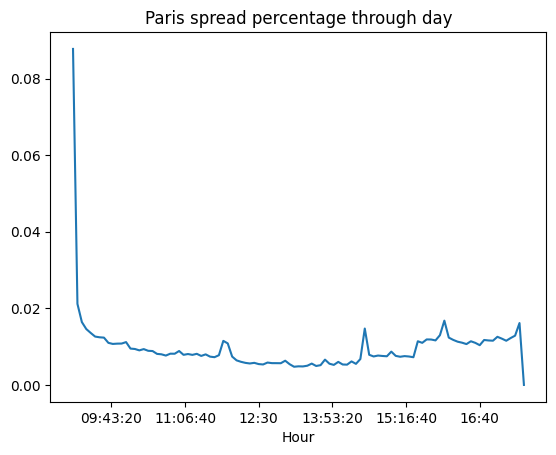

In [ ]:
df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris['Hour'] = df_Paris.index.time

df_Paris['Spread'] = df_Paris['AskPrice'] - df_Paris['BidPrice']

spread = df_Paris.groupby('Hour')['Spread'].sum()
spread = spread[spread > 0]

spread = spread/np.sum(spread)
spread.plot(title="Paris spread percentage through day")

<Axes: title={'center': 'Nasdaq spread percentage through day'}, xlabel='Hour'>

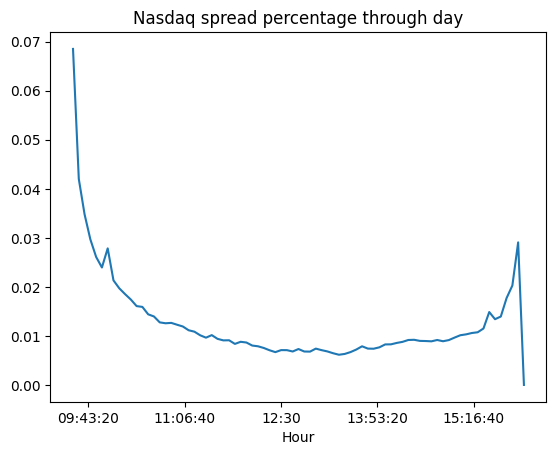

In [ ]:
df_Nasdaq = Nasdaq['AMAZON'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()+Nasdaq['APPLE'].resample('5min').sum()
df_Nasdaq['Hour'] = df_Nasdaq.index.time

df_Nasdaq['Spread'] = df_Nasdaq['AskPrice'] - df_Nasdaq['BidPrice']

spread = df_Nasdaq.groupby('Hour')['Spread'].sum()
spread = spread[spread > 0]

spread = spread/np.sum(spread)
spread.plot(title="Nasdaq spread percentage through day")

<Axes: title={'center': 'Tokyo spread percentage through day'}, xlabel='Hour'>

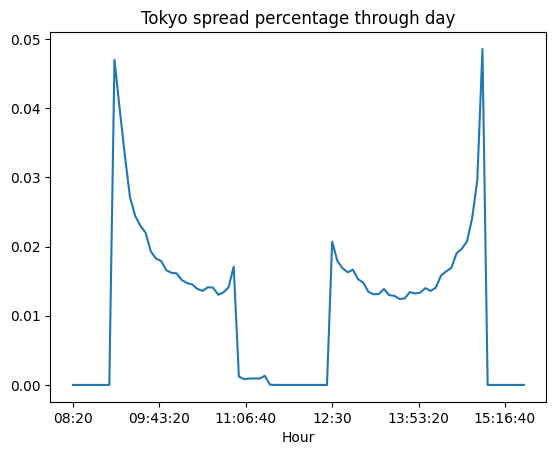

In [ ]:
df_Tokyo = Tokyo['PANASONIC'].resample('5min').sum()+Tokyo['SONY'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()
df_Tokyo['Hour'] = df_Tokyo.index.time

df_Tokyo['Spread'] = df_Tokyo['AskPrice'] - df_Tokyo['BidPrice']

spread = df_Tokyo.groupby('Hour')['Spread'].sum()
#turnover = turnover[turnover > 0]

spread = spread/np.sum(spread)
spread[100:-100].plot(title="Tokyo spread percentage through day")

**Commentaires.**

The average spread curves represent the difference between the best ask and bid prices, offering insights into market liquidity and transaction costs. Across all three stock exchanges, the spread curves exhibit a consistent pattern of decreasing spread as the trading day progresses.

In the Paris exchange, while there are minor fluctuations in spread observed at 11:30 AM, 2:30 PM, and 3:30 PM, the overall trend indicates a gradual decrease in spread over time. This decline in spread may reflect increasing market liquidity or reduced transaction costs as the trading day advances.

Similarly, on the Nasdaq and Tokyo exchanges, the spread curves demonstrate a stable trend with no significant peaks observed except at opening and closure of markets. However, the consistent decrease in spread throughout the trading day suggests a common pattern of improving market liquidity and decreasing transaction costs over time.

Overall, the decreasing spread observed across all three exchanges underscores the importance of time dynamics in market liquidity and transaction efficiency. This trend may influence trading strategies, as traders may seek to capitalize on lower transaction costs during periods of reduced spread. Additionally, understanding the temporal patterns of spread can inform optimal trading times and enhance risk management practices.





### 5. Volatility curves

$sum (P_t - P_{t-1})^2$

Python : df["TradedPrice"].diff()**2

<Axes: title={'center': 'Paris volatility percentage through day'}, xlabel='Hour'>

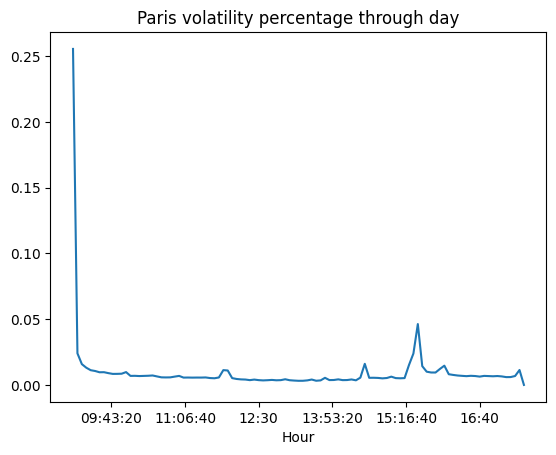

In [ ]:
df_Paris = pd.concat([Paris['BOUYGUES']['TradedPrice'].diff()**2, Paris['LVMH']['TradedPrice'].diff()**2, Paris['SANOFI']['TradedPrice'].diff()**2, Paris['TOTAL']['TradedPrice'].diff()**2])

df_Paris = df_Paris.resample('5min').sum()
df_Paris = pd.DataFrame({'Volatility':df_Paris.values,'Hour':df_Paris.index.time})

volatility = df_Paris.groupby('Hour')['Volatility'].sum()
volatility = volatility[volatility > 0]

volatility = volatility/np.sum(volatility)
volatility.plot(title="Paris volatility percentage through day")

<Axes: title={'center': 'Nasdaq volatility percentage through day'}, xlabel='Hour'>

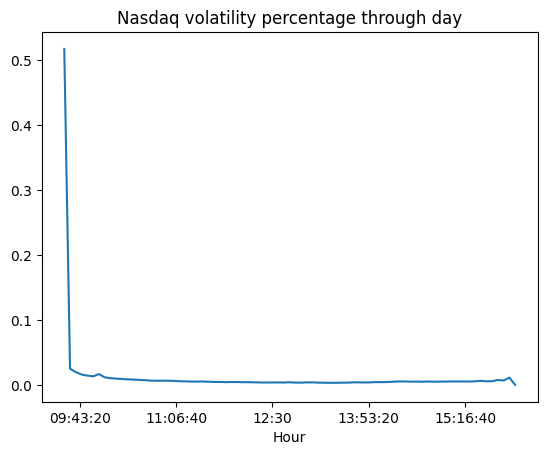

In [ ]:
df_Nasdaq = pd.concat([Nasdaq['APPLE']['TradedPrice'].diff()**2, Nasdaq['GOOGLE']['TradedPrice'].diff()**2, Nasdaq['AMAZON']['TradedPrice'].diff()**2])

df_Nasdaq = df_Nasdaq.resample('5min').sum()
df_Nasdaq = pd.DataFrame({'Volatility':df_Nasdaq.values,'Hour':df_Nasdaq.index.time})

volatility = df_Nasdaq.groupby('Hour')['Volatility'].sum()
volatility = volatility[volatility > 0]

volatility = volatility/np.sum(volatility)
volatility.plot(title="Nasdaq volatility percentage through day")

<Axes: title={'center': 'Tokyo volatility percentage through day'}, xlabel='Hour'>

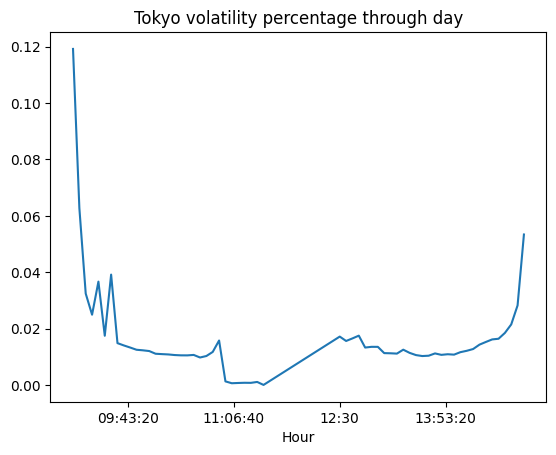

In [ ]:
df_Tokyo = pd.concat([Tokyo['SONY']['TradedPrice'].diff()**2, Tokyo['PANASONIC']['TradedPrice'].diff()**2, Tokyo['CANON']['TradedPrice'].diff()**2])

df_Tokyo = df_Tokyo.resample('5min').sum()
df_Tokyo = pd.DataFrame({'Volatility':df_Tokyo.values,'Hour':df_Tokyo.index.time})

volatility = df_Tokyo.groupby('Hour')['Volatility'].sum()
volatility = volatility[volatility > 0]

volatility = volatility/np.sum(volatility)
volatility.plot(title="Tokyo volatility percentage through day")

**Commentaires.**

The volatility curves depict the magnitude of price fluctuations throughout the trading day, providing insights into market risk and uncertainty. Across the three stock exchanges, distinct patterns emerge in the volatility curves, reflecting unique characteristics of each market.

In the Paris exchange, volatility is highest at the beginning of the trading day, gradually decreasing over time. This pattern suggests that the market experiences heightened uncertainty and price fluctuations during the opening hours, possibly due to the influx of trading activity and market participants adjusting their positions. As the trading day progresses, volatility tends to decrease, indicating a stabilization of prices and reduced risk.

On the Nasdaq exchange, a similar pattern is observed, with volatility peaking at the start of the trading day and declining thereafter. This trend aligns with the observations in the Paris exchange, highlighting the commonality of high volatility during market openings across different stock exchanges.

Interestingly, the Tokyo exchange exhibits a unique volatility pattern characterized by a U-shaped curve. While volatility is relatively low during the morning hours with still some spikes, it mostly spikes around midday, coinciding with the lunch break observed in the Tokyo market. Following the lunch break, volatility subsides but remains elevated compared to the morning hours, indicating a resurgence of price fluctuations in the afternoon session. This U-shaped volatility curve reflects the impact of market breaks and trading hours on price dynamics in the Tokyo exchange.

Overall, the volatility curves provide valuable insights into market risk dynamics and trading behavior, with each exchange displaying distinct patterns influenced by market structure and trading hours. Understanding these volatility patterns can inform risk management strategies and help traders navigate market uncertainties effectively.

### 6. Imbalance curves (unsigned $|Q_{ask}-Q_{bid}|/(Q_{ask}+Q_{bid})$ or signed $(Q_{ask}-Q_{bid})/(Q_{ask}+Q_{bid})$)

<Axes: title={'center': 'Paris absolute imbalance percentage through day'}, xlabel='Hour'>

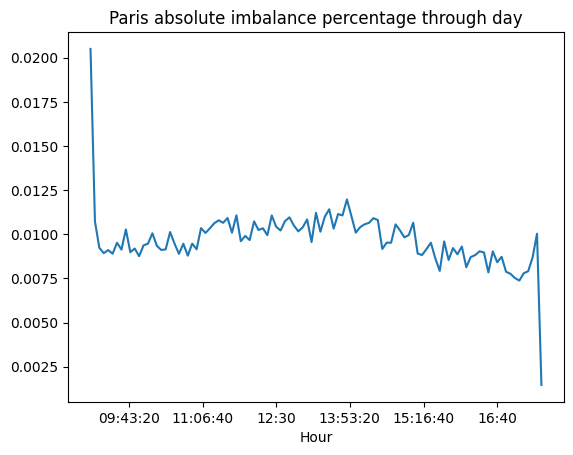

In [ ]:
df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris['Hour'] = df_Paris.index.time

df_Paris['Imbalance'] = np.abs(df_Paris["AskQty"] - df_Paris["BidQty"])/(df_Paris["AskQty"] + df_Paris["BidQty"])

imbalance = df_Paris.groupby('Hour')['Imbalance'].sum()
imbalance = imbalance[imbalance > 0]

imbalance = imbalance/np.sum(imbalance)
imbalance.plot(title="Paris absolute imbalance percentage through day")

<Axes: title={'center': 'Nasdaq absolute imbalance percentage through day'}, xlabel='Hour'>

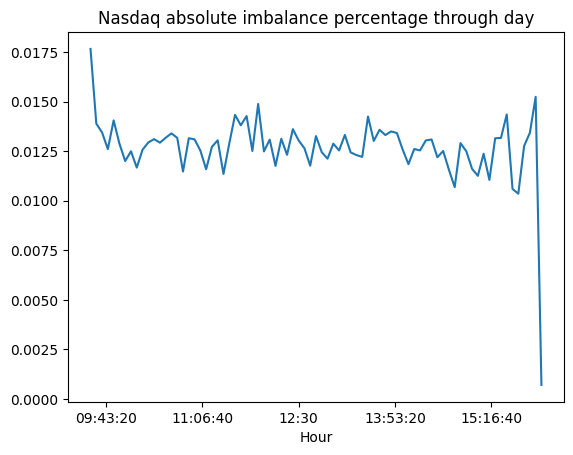

In [ ]:
df_Nasdaq = Nasdaq['APPLE'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()+Nasdaq['AMAZON'].resample('5min').sum()
df_Nasdaq['Hour'] = df_Nasdaq.index.time

df_Nasdaq['Imbalance'] = np.abs(df_Nasdaq["AskQty"] - df_Nasdaq["BidQty"])/(df_Nasdaq["AskQty"] + df_Nasdaq["BidQty"])

imbalance = df_Nasdaq.groupby('Hour')['Imbalance'].sum()
imbalance = imbalance[imbalance > 0]

imbalance = imbalance/np.sum(imbalance)
imbalance.plot(title="Nasdaq absolute imbalance percentage through day")

<Axes: title={'center': 'Tokyo absolute imbalance percentage through day'}, xlabel='Hour'>

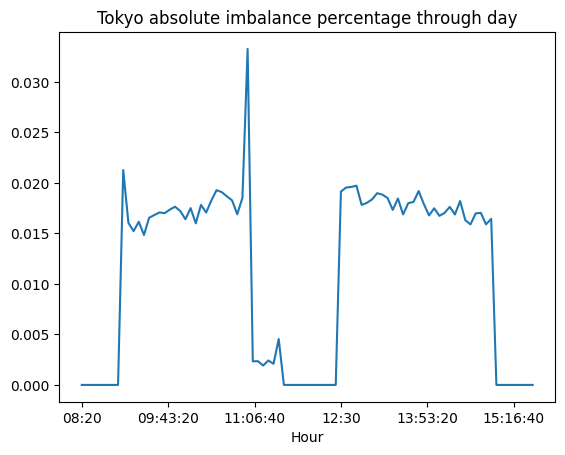

In [ ]:
df_Tokyo = Tokyo['SONY'].resample('5min').sum()+Tokyo['PANASONIC'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()
df_Tokyo['Hour'] = df_Tokyo.index.time

df_Tokyo['Imbalance'] = np.abs(df_Tokyo["AskQty"] - df_Tokyo["BidQty"])/(df_Tokyo["AskQty"] + df_Tokyo["BidQty"])

imbalance = df_Tokyo.groupby('Hour')['Imbalance'].sum()
#imbalance = imbalance[imbalance > 0]

imbalance = imbalance/np.sum(imbalance)
imbalance[100:-100].plot(title="Tokyo absolute imbalance percentage through day")

**Commentaires.**
Those curves are very different from the others. First, the curves aren't smooth, even the Nasdaq one. Second, we can't find the spikes previously found in the Paris exchange. Third, the absolute imbalance for Tokyo in the afternoon is rather constant and doesn't change much at opening and closing.





### 7. Courbes des quantités aux meilleures limites $Q_{ask}+Q_{bid}$

<Axes: title={'center': 'Paris best quantity percentage through day'}, xlabel='Hour'>

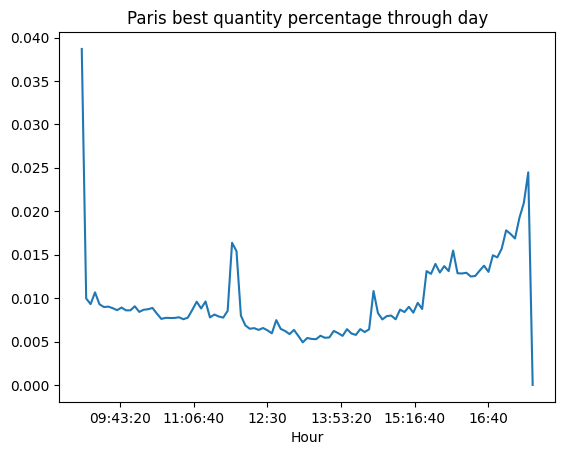

In [ ]:
df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris['Hour'] = df_Paris.index.time

df_Paris['BestQty'] = df_Paris["AskQty"] + df_Paris["BidQty"]

bestqty = df_Paris.groupby('Hour')['BestQty'].sum()
bestqty = bestqty[bestqty > 0]

bestqty = bestqty/np.sum(bestqty)
bestqty.plot(title="Paris best quantity percentage through day")

<Axes: title={'center': 'Nasdaq best quantity percentage through day'}, xlabel='Hour'>

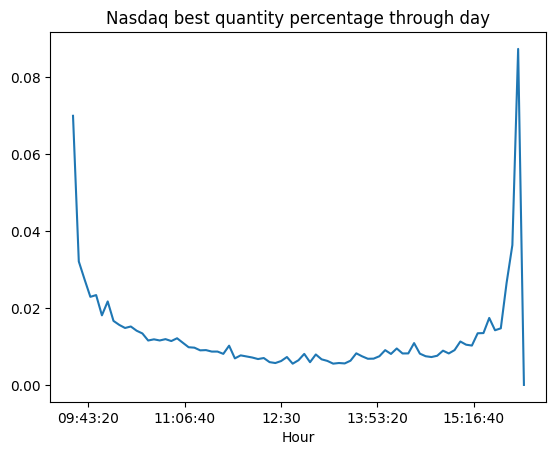

In [ ]:
df_Nasdaq = Nasdaq['APPLE'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()+Nasdaq['AMAZON'].resample('5min').sum()
df_Nasdaq['Hour'] = df_Nasdaq.index.time
df_Nasdaq['BestQty'] = df_Nasdaq["AskQty"] + df_Nasdaq["BidQty"]

bestqty = df_Nasdaq.groupby('Hour')['BestQty'].sum()
bestqty = bestqty[bestqty > 0]

bestqty = bestqty/np.sum(bestqty)
bestqty.plot(title="Nasdaq best quantity percentage through day")

<Axes: title={'center': 'Tokyo best quantity percentage through day'}, xlabel='Hour'>

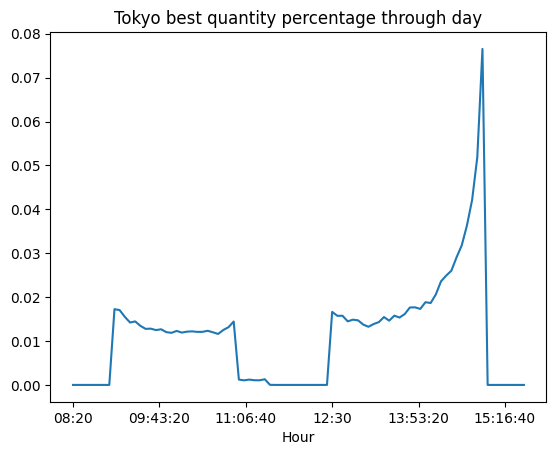

In [ ]:
df_Tokyo = Tokyo['SONY'].resample('5min').sum()+Tokyo['PANASONIC'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()
df_Tokyo['Hour'] = df_Tokyo.index.time
df_Tokyo['BestQty'] = df_Tokyo["AskQty"] + df_Tokyo["BidQty"]

bestqty = df_Tokyo.groupby('Hour')['BestQty'].sum()
#bestqty = bestqty[bestqty > 0]

bestqty = bestqty/np.sum(bestqty)
bestqty[100:-100].plot(title="Tokyo best quantity percentage through day")

**Commentaires.**
We once again find similar behavior as previous curves. We get back the spikes for the Paris exchange and we also see a new phenomenum : the quantity at besk ask and bid explode at the end of the day for the Tokyo exchange while only slightly moving since the morning opening.


## III. Relation entre les indicateurs journaliers

You will now look at the relationship between certain daily indicators using linear regressions:
* relationship between volumes and number of trades,
* between turnovers and number of trades,
* between volatility per trade and bid-ask spread.

As before, you'll make a chart for each stock market, showing the 3 or 4 assets of each. You will then comment on the results obtained for each relationship.

In [ ]:
import scipy.stats as sps
import statsmodels.api as sm

### 1. Volume/trades relationship

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          8.54e-240
Time:                        20:29:41   Log-Likelihood:                -3035.0
No. Observations:                 288   AIC:                             6074.
Df Residuals:                     286   BIC:                             6081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2239.2612    641.998      3.488      0.0

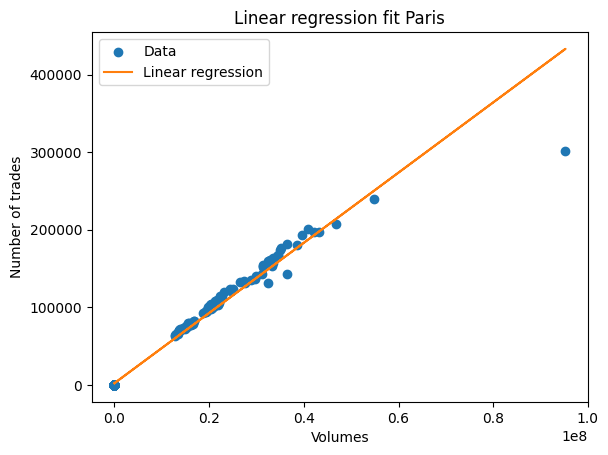

In [ ]:
# Getting the number of trade in sample of 5 min
Num_Trades_Paris = pd.DataFrame(Paris['BOUYGUES'].resample('5min').size()+Paris['LVMH'].resample('5min').size()+Paris['SANOFI'].resample('5min').size()+Paris['TOTAL'].resample('5min').size())
Num_Trades_Paris['Hour'] = Num_Trades_Paris.index.time

# Agregate the number of trades to the time of day
Num_Trades_Paris = Num_Trades_Paris.groupby('Hour').sum()
Num_Trades_Paris = Num_Trades_Paris.values

# Getting the volumes of trade agregated to the time of day
df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris['Hour'] = df_Paris.index.time

Volumes = df_Paris.groupby('Hour')["TradedQty"].sum()
Volumes = Volumes.values

Volumes = sm.add_constant(Volumes)

model = sm.OLS(Num_Trades_Paris.T[0], Volumes)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Volumes)


# plotting the linear fitting
plt.scatter(Volumes[:,1], Num_Trades_Paris, label="Data",color='C0')
plt.plot(Volumes[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel("Volumes")
plt.ylabel("Number of trades")
plt.title("Linear regression fit Paris")
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 7.016e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:29:43   Log-Likelihood:                -2846.7
No. Observations:                 288   AIC:                             5697.
Df Residuals:                     286   BIC:                             5705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        946.6720    312.226      3.032      0.0

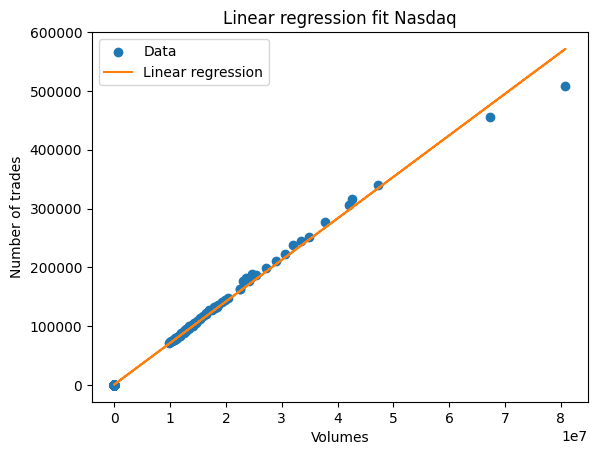

In [ ]:
# Getting the number of trade in sample of 5 min
Num_Trades_Nasdaq = pd.DataFrame(Nasdaq['AMAZON'].resample('5min').size()+Nasdaq['APPLE'].resample('5min').size()+Nasdaq['GOOGLE'].resample('5min').size())
Num_Trades_Nasdaq['Hour'] = Num_Trades_Nasdaq.index.time

# Agregate the number of trades to the time of day
Num_Trades_Nasdaq = Num_Trades_Nasdaq.groupby('Hour').sum()
Num_Trades_Nasdaq = Num_Trades_Nasdaq.values

# Getting the volumes of trade agregated to the time of day
df_Nasdaq = Nasdaq['AMAZON'].resample('5min').sum()+Nasdaq['APPLE'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()
df_Nasdaq['Hour'] = df_Nasdaq.index.time

Volumes = df_Nasdaq.groupby('Hour')["TradedQty"].sum()
Volumes = Volumes.values

Volumes = sm.add_constant(Volumes)

model = sm.OLS(Num_Trades_Nasdaq.T[0], Volumes)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Volumes)

# plotting the linear fitting
plt.scatter(Volumes[:,1], Num_Trades_Nasdaq, label="Data",color='C0')
plt.plot(Volumes[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel("Volumes")
plt.ylabel("Number of trades")
plt.title("Linear regression fit Nasdaq")
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     6266.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          1.57e-196
Time:                        20:29:44   Log-Likelihood:                -2834.0
No. Observations:                 288   AIC:                             5672.
Df Residuals:                     286   BIC:                             5679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        451.7343    293.177      1.541      0.1

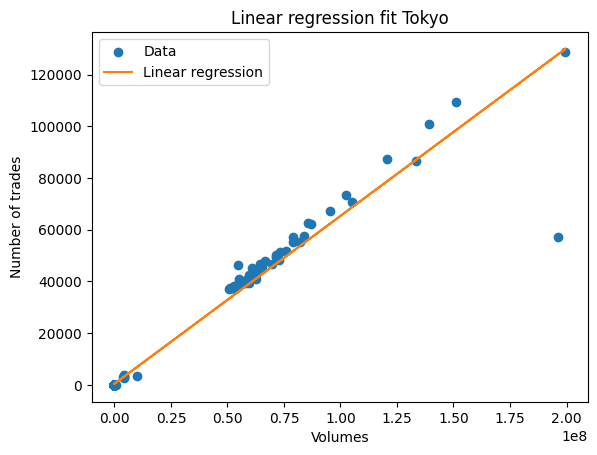

In [ ]:
# Getting the number of trade in sample of 5 min
Num_Trades_Tokyo = pd.DataFrame(Tokyo['CANON'].resample('5min').size()+Tokyo['SONY'].resample('5min').size()+Tokyo['PANASONIC'].resample('5min').size())
Num_Trades_Tokyo['Hour'] = Num_Trades_Tokyo.index.time

# Agregate the number of trades to the time of day
Num_Trades_Tokyo = Num_Trades_Tokyo.groupby('Hour').sum()
Num_Trades_Tokyo = Num_Trades_Tokyo.values

# Getting the volumes of trade agregated to the time of day
df_Tokyo = Tokyo['CANON'].resample('5min').sum()+Tokyo['SONY'].resample('5min').sum()+Tokyo['PANASONIC'].resample('5min').sum()
df_Tokyo['Hour'] = df_Tokyo.index.time

Volumes = df_Tokyo.groupby('Hour')["TradedQty"].sum()
Volumes = Volumes.values

Volumes = sm.add_constant(Volumes)

model = sm.OLS(Num_Trades_Tokyo.T[0], Volumes)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Volumes)

# plotting the linear fitting
plt.scatter(Volumes[:,1], Num_Trades_Tokyo, label="Data",color='C0')
plt.plot(Volumes[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel("Volumes")
plt.ylabel("Number of trades")
plt.title("Linear regression fit Tokyo")
plt.legend()
plt.show()


**Commentaires.**

# **Paris**:

The linear regression analysis reveals a strong positive relationship between trading volumes and the number of trades in the Paris exchange. The high R-squared value of 0.978 indicates that approximately 97.8% of the variation in the number of trades can be explained by changes in trading volumes. The coefficient for volumes (0.0045) suggests that, on average, for every unit increase in trading volumes, there is a corresponding increase of 0.0045 units in the number of trades. This relationship underscores the close link between trading volumes and the frequency of trades in the Paris market.

The coefficient for the constant term (const) is 2239.2612 with a standard error of 641.998. This indicates that when trading volumes are zero, the expected number of trades is approximately 2239.26. The t-value of 3.488 and the p-value of 0.001 suggest that this constant term is statistically significant.

The coefficient for trading volumes (x1) is 0.0045 with a standard error of 3.99e-05. This implies that for every unit increase in trading volumes, the expected number of trades increases by 0.0045 units. The high t-value of 113.420 and the very low p-value (close to zero) indicate that this coefficient is highly statistically significant.

# **Nasdaq**:

Similarly, in the Nasdaq exchange, the linear regression analysis demonstrates a robust positive relationship between trading volumes and the number of trades, with an R-squared value of 0.996. This indicates that approximately 99.6% of the variation in the number of trades can be attributed to changes in trading volumes. The coefficient for volumes (0.0071) indicates that, on average, a unit increase in trading volumes corresponds to a 0.0071 unit increase in the number of trades. This relationship highlights the strong correlation between trading volumes and trading frequency in the Nasdaq market.

The coefficient for the constant term (const) is 946.6720 with a standard error of 312.226. This suggests that when trading volumes are zero, the expected number of trades is approximately 946.67. The t-value of 3.032 and the p-value of 0.003 indicate that this constant term is statistically significant.
The coefficient for trading volumes (x1) is 0.0071 with a standard error of 2.66e-05. This implies that for every unit increase in trading volumes, the expected number of trades increases by 0.0071 units. The high t-value of 264.882 and the very low p-value (close to zero) indicate that this coefficient is highly statistically significant.

# **Tokyo:**

In the Tokyo exchange, the linear regression analysis reveals a positive relationship between trading volumes and the number of trades, although with a lower R-squared value of 0.956 compared to Paris and Nasdaq. The coefficient for volumes (0.0006) indicates a relatively smaller impact of trading volumes on the number of trades compared to the other exchanges. Nonetheless, the significant relationship suggests that changes in trading volumes are associated with variations in the number of trades in the Tokyo market.

The coefficient for the constant term (const) is 451.7343 with a standard error of 293.177. This suggests that when trading volumes are zero, the expected number of trades is approximately 451.73. The t-value of 1.541 and the p-value of 0.124 indicate that this constant term is not statistically significant at conventional levels (p > 0.05).
The coefficient for trading volumes (x1) is 0.0006 with a standard error of 8.2e-06. This implies that for every unit increase in trading volumes, the expected number of trades increases by 0.0006 units. The high t-value of 79.161 and the very low p-value (close to zero) indicate that this coefficient is highly statistically significant.

### 2. Turnovers/trades

#### With aggregate on each exchange

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     6305.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          6.83e-197
Time:                        20:29:47   Log-Likelihood:                -3735.5
No. Observations:                 288   AIC:                             7475.
Df Residuals:                     286   BIC:                             7482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        477.2789   7407.426      0.064      0.9

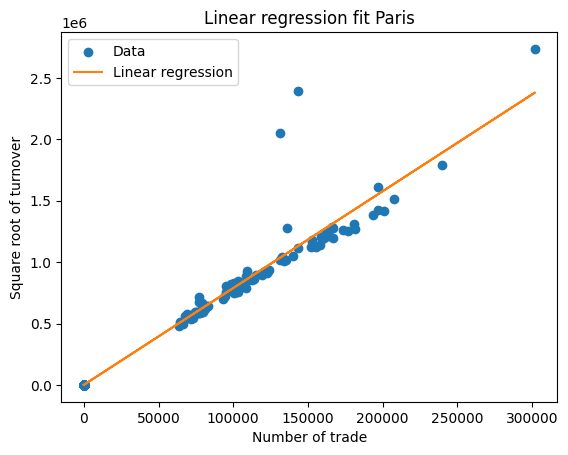

In [ ]:
# Getting the number of trade in sample of 5 min
Num_Trades_Paris = pd.DataFrame(Paris['BOUYGUES'].resample('5min').size()+Paris['LVMH'].resample('5min').size()+Paris['SANOFI'].resample('5min').size()+Paris['TOTAL'].resample('5min').size())
Num_Trades_Paris['Hour'] = Num_Trades_Paris.index.time

# Agregate the number of trades to the time of day
Num_Trades_Paris = Num_Trades_Paris.groupby('Hour').sum()
Num_Trades_Paris = (Num_Trades_Paris.values).T[0]

# Getting the volumes of trade agregated to the time of day
df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris['Hour'] = df_Paris.index.time

df_Paris["Turnover"] = df_Paris["TradedQty"]*df_Paris["TradedPrice"]
Turnover = df_Paris.groupby('Hour')["Turnover"].sum()
Turnover = Turnover.values

Num_Trades_Paris = sm.add_constant(Num_Trades_Paris)
model = sm.OLS(np.sqrt(Turnover), Num_Trades_Paris)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Num_Trades_Paris)

# plotting the linear fitting
plt.scatter(Num_Trades_Paris[:,1], np.sqrt(Turnover), label="Data",color='C0')
plt.plot(Num_Trades_Paris[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel("Number of trade")
plt.ylabel("Square root of turnover")
plt.title("Linear regression fit Paris")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.459e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:29:49   Log-Likelihood:                -3624.8
No. Observations:                 288   AIC:                             7254.
Df Residuals:                     286   BIC:                             7261.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2786.8002   4675.581      0.596      0.5

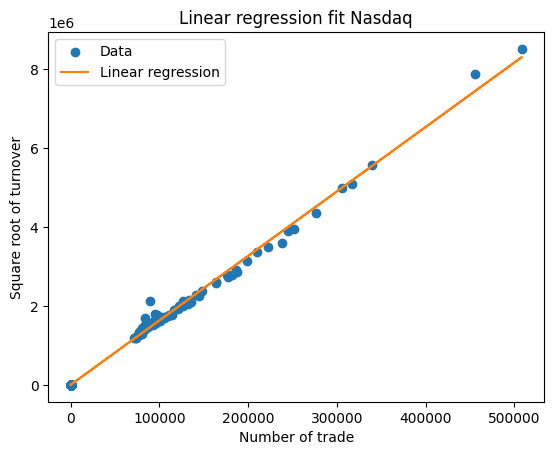

In [ ]:
# Getting the number of trade in sample of 5 min
Num_Trades_Nasdaq = pd.DataFrame(Nasdaq['AMAZON'].resample('5min').size()+Nasdaq['APPLE'].resample('5min').size()+Nasdaq['GOOGLE'].resample('5min').size())
Num_Trades_Nasdaq['Hour'] = Num_Trades_Nasdaq.index.time

# Agregate the number of trades to the time of day
Num_Trades_Nasdaq = Num_Trades_Nasdaq.groupby('Hour').sum()
Num_Trades_Nasdaq = (Num_Trades_Nasdaq.values).T[0]

# Getting the volumes of trade agregated to the time of day
df_Nasdaq = Nasdaq['AMAZON'].resample('5min').sum()+Nasdaq['APPLE'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()
df_Nasdaq['Hour'] = df_Nasdaq.index.time

df_Nasdaq["Turnover"] = df_Nasdaq["TradedQty"]*df_Nasdaq["TradedPrice"]
Turnover = df_Nasdaq.groupby('Hour')["Turnover"].sum()
Turnover = Turnover.values

Num_Trades_Nasdaq = sm.add_constant(Num_Trades_Nasdaq)
model = sm.OLS(np.sqrt(Turnover), Num_Trades_Nasdaq)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Num_Trades_Nasdaq)

# plotting the linear fitting
plt.scatter(Num_Trades_Nasdaq[:,1], np.sqrt(Turnover), label="Data",color='C0')
plt.plot(Num_Trades_Nasdaq[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel("Number of trade")
plt.ylabel("Square root of turnover")
plt.title("Linear regression fit Nasdaq")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.490e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          6.30e-301
Time:                        20:29:50   Log-Likelihood:                -3987.6
No. Observations:                 288   AIC:                             7979.
Df Residuals:                     286   BIC:                             7986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.902e+04   1.62e+04      1.177      0.2

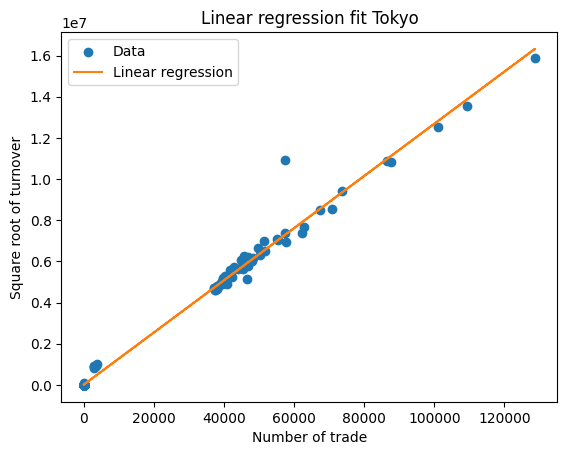

In [ ]:
# Getting the number of trade in sample of 5 min
Num_Trades_Tokyo = pd.DataFrame(Tokyo['SONY'].resample('5min').size()+Tokyo['PANASONIC'].resample('5min').size()+Tokyo['CANON'].resample('5min').size())
Num_Trades_Tokyo['Hour'] = Num_Trades_Tokyo.index.time

# Agregate the number of trades to the time of day
Num_Trades_Tokyo = Num_Trades_Tokyo.groupby('Hour').sum()
Num_Trades_Tokyo = (Num_Trades_Tokyo.values).T[0]

# Getting the volumes of trade agregated to the time of day
df_Tokyo = Tokyo['SONY'].resample('5min').sum()+Tokyo['PANASONIC'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()
df_Tokyo['Hour'] = df_Tokyo.index.time

df_Tokyo["Turnover"] = df_Tokyo["TradedQty"]*df_Tokyo["TradedPrice"]
Turnover = df_Tokyo.groupby('Hour')["Turnover"].sum()
Turnover = Turnover.values

Num_Trades_Tokyo = sm.add_constant(Num_Trades_Tokyo)
model = sm.OLS(np.sqrt(Turnover), Num_Trades_Tokyo)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Num_Trades_Tokyo)

# plotting the linear fitting
plt.scatter(Num_Trades_Tokyo[:,1], np.sqrt(Turnover), label="Data",color='C0')
plt.plot(Num_Trades_Tokyo[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel("Number of trade")
plt.ylabel("Square root of turnover")
plt.title("Linear regression fit Tokyo")
plt.legend()
plt.show()


**Comments.**

# **Paris:**

The constant term (const) has a coefficient of 477.2789 with a very high standard error of 7407.426. The t-value is 0.064, and the p-value is 0.949, indicating that the constant term is not statistically significant.

The coefficient for the number of trades (x1) is 7.8831 with a standard error of 0.099. The t-value of 79.403 and the very low p-value (close to zero) suggest that this coefficient is highly statistically significant. This implies that for every unit increase in the number of trades, the square root of turnover increases by approximately 7.8831 units.

The R-squared value of 0.957 indicates that approximately 95.7% of the variation in the square root of turnover can be explained by changes in the number of trades.

# **Nasdaq:**

The constant term (const) has a coefficient of 2786.8002 with a standard error of 4675.581. The t-value is 0.596, and the p-value is 0.552, indicating that the constant term is not statistically significant.

The coefficient for the number of trades (x1) is 16.3337 with a standard error of 0.056. The t-value of 290.850 and the very low p-value (close to zero) suggest that this coefficient is highly statistically significant. This implies that for every unit increase in the number of trades, the square root of turnover increases by approximately 16.3337 units.

The R-squared value of 0.997 indicates that approximately 99.7% of the variation in the square root of turnover can be explained by changes in the number of trades.

# **Tokyo:**
The constant term (const) has a coefficient of 19020.0002 with a standard error of 16200.000. The t-value is 1.177, and the p-value is 0.240, indicating that the constant term is not statistically significant.

The coefficient for the number of trades (x1) is 126.6881 with a standard error of 0.678. The t-value of 186.824 and the very low p-value (close to zero) suggest that this coefficient is highly statistically significant. This implies that for every unit increase in the number of trades, the square root of turnover increases by approximately 126.6881 units.

The R-squared value of 0.992 indicates that approximately 99.2% of the variation in the square root of turnover can be explained by changes in the number of trades.

These results provide insights into the relationship between the number of trades and turnover, indicating their statistical significance and the magnitude of their effects on each other across different stock exchanges.

### 3. Volatility per trade/bid-ask spread relationship

Volatility can be seen as a measure of the amount of information contained in the price. In practice, this information is correlated with the order flow that anticipates or causes price movements.

It's well known that spread and volatility are intimately linked: while spread sets the profit per transaction for market makers, volatility determines the adverse selection they face.
In any model where market makers break even, there must be an equation fixing the relationship between bid-ask spread and volatility.

This relationship has been the subject of several models attempting to justify it at the microscopic level, since it is empirically observed in the data.

In the simplest possible model by Madhavan, Richardson and Roomans (MRR) in 1997, we obtain that
$$\varphi=c\sigma_{mid} N^{-1/2},$$
where $\varphi$ is the bid-ask spread, $\sigma_{mid}$ is the volatility of the mid price, $N$ is the number of transactions and $c>0$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     516.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           4.65e-66
Time:                        20:29:52   Log-Likelihood:                -2457.6
No. Observations:                 288   AIC:                             4919.
Df Residuals:                     286   BIC:                             4926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -63.0702     87.528     -0.721      0.4

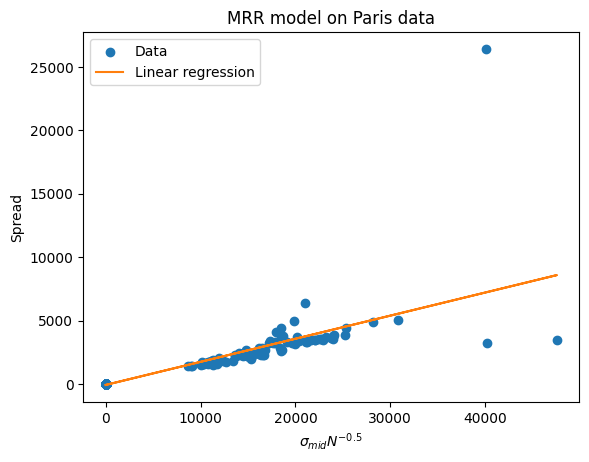

In [ ]:
Num_Trades_Paris = pd.DataFrame(Paris['BOUYGUES'].resample('5min').size()+Paris['LVMH'].resample('5min').size()+Paris['SANOFI'].resample('5min').size()+Paris['TOTAL'].resample('5min').size())
Num_Trades_Paris['Hour'] = Num_Trades_Paris.index.time

# Agregate the number of trades to the time of day
Num_Trades_Paris = Num_Trades_Paris.groupby('Hour').sum()
Num_Trades_Paris = Num_Trades_Paris.values


df_Paris = Paris['BOUYGUES'].resample('5min').sum()+Paris['LVMH'].resample('5min').sum()+Paris['SANOFI'].resample('5min').sum()+Paris['TOTAL'].resample('5min').sum()
df_Paris["Hour"] = df_Paris.index.time

df_Paris["Spread"] = df_Paris["AskPrice"] - df_Paris["BidPrice"]
df_Paris["Mid_Price"] = (df_Paris["AskPrice"]+df_Paris["BidPrice"])/2.


Vol_Mid_Price = (df_Paris.groupby('Hour')["Mid_Price"].std()).values
Spread = (df_Paris.groupby('Hour')["Spread"].sum()).values

Prediction = (Vol_Mid_Price*np.power(Num_Trades_Paris+1,-.5))[0]


Prediction = sm.add_constant(Prediction)
model = sm.OLS(Spread, Prediction)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Prediction)

plt.scatter(Prediction[:,1],Spread,label='Data',color='C0')
plt.plot(Prediction[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel(r"$\sigma_{mid}N^{-0.5}$")
plt.ylabel("Spread")
plt.title("MRR model on Paris data")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     3737.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          3.12e-166
Time:                        20:29:55   Log-Likelihood:                -2681.5
No. Observations:                 288   AIC:                             5367.
Df Residuals:                     286   BIC:                             5374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -312.1766    177.747     -1.756      0.0

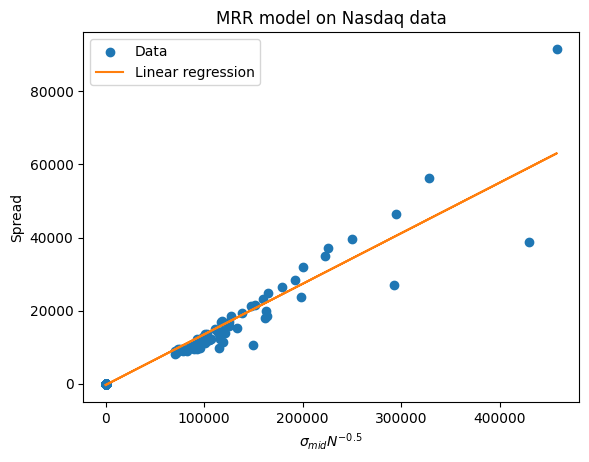

In [ ]:
Num_Trades_Nasdaq = pd.DataFrame(Nasdaq['AMAZON'].resample('5min').size()+Nasdaq['GOOGLE'].resample('5min').size()+Nasdaq['APPLE'].resample('5min').size())
Num_Trades_Nasdaq['Hour'] = Num_Trades_Nasdaq.index.time

# Agregate the number of trades to the time of day
Num_Trades_Nasdaq = Num_Trades_Nasdaq.groupby('Hour').sum()
Num_Trades_Nasdaq = Num_Trades_Nasdaq.values


df_Nasdaq = Nasdaq['AMAZON'].resample('5min').sum()+Nasdaq['GOOGLE'].resample('5min').sum()+Nasdaq['APPLE'].resample('5min').sum()
df_Nasdaq["Hour"] = df_Nasdaq.index.time

df_Nasdaq["Spread"] = df_Nasdaq["AskPrice"] - df_Nasdaq["BidPrice"]
df_Nasdaq["Mid_Price"] = (df_Nasdaq["AskPrice"]+df_Nasdaq["BidPrice"])/2.


Vol_Mid_Price = (df_Nasdaq.groupby('Hour')["Mid_Price"].std()).values
Spread = (df_Nasdaq.groupby('Hour')["Spread"].sum()).values

Prediction = (Vol_Mid_Price*np.power(Num_Trades_Nasdaq+1,-.5))[0]


Prediction = sm.add_constant(Prediction)
model = sm.OLS(Spread, Prediction)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Prediction)

plt.scatter(Prediction[:,1],Spread,label='Data',color='C0')
plt.plot(Prediction[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel(r"$\sigma_{mid}N^{-0.5}$")
plt.ylabel("Spread")
plt.title("MRR model on Nasdaq data")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.016e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          3.38e-267
Time:                        20:29:56   Log-Likelihood:                -2914.4
No. Observations:                 288   AIC:                             5833.
Df Residuals:                     286   BIC:                             5840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -937.2960    390.702     -2.399      0.0

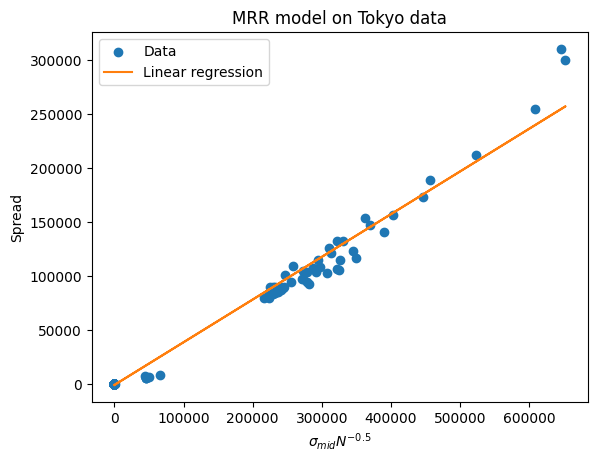

In [ ]:
Num_Trades_Tokyo = pd.DataFrame(Tokyo['SONY'].resample('5min').size()+Tokyo['CANON'].resample('5min').size()+Tokyo['PANASONIC'].resample('5min').size())
Num_Trades_Tokyo['Hour'] = Num_Trades_Tokyo.index.time

# Agregate the number of trades to the time of day
Num_Trades_Tokyo = Num_Trades_Tokyo.groupby('Hour').sum()
Num_Trades_Tokyo = Num_Trades_Tokyo.values


df_Tokyo = Tokyo['SONY'].resample('5min').sum()+Tokyo['CANON'].resample('5min').sum()+Tokyo['PANASONIC'].resample('5min').sum()
df_Tokyo["Hour"] = df_Tokyo.index.time

df_Tokyo["Spread"] = df_Tokyo["AskPrice"] - df_Tokyo["BidPrice"]
df_Tokyo["Mid_Price"] = (df_Tokyo["AskPrice"]+df_Tokyo["BidPrice"])/2.


Vol_Mid_Price = (df_Tokyo.groupby('Hour')["Mid_Price"].std()).values
Spread = (df_Tokyo.groupby('Hour')["Spread"].sum()).values

Prediction = (Vol_Mid_Price*np.power(Num_Trades_Tokyo+1,-.5))[0]


Prediction = sm.add_constant(Prediction)
model = sm.OLS(Spread, Prediction)    # Create a linear regression model
results = model.fit()   # Fit the model

# Optionally, print the summary
print(results.summary())

# Predicted values
y_pred = results.predict(Prediction)

plt.scatter(Prediction[:,1],Spread,label='Data',color='C0')
plt.plot(Prediction[:,1],y_pred, label="Linear regression",color='C1')
plt.xlabel(r"$\sigma_{mid}N^{-0.5}$")
plt.ylabel("Spread")
plt.title("MRR model on Tokyo data")
plt.legend()
plt.show()

**Comments.**

MRR modeling is a good approximation, although it seems less reliable than previous relationships.

Let's examine the coefficients and p-values from the linear regression results for the volatility per trade/bid-ask spread relationship based on the MRR model:

# **Paris:**

The constant term (const) has a coefficient of -63.0702 with a standard error of 87.528. The t-value is -0.721, and the p-value is 0.472, indicating that the constant term is not statistically significant.

The coefficient for the predictor $\sigma_{mid}N^{-0.5}$ (x1) is 0.1820 with a standard error of 0.008. The t-value of 22.734 and the very low p-value (close to zero) suggest that this coefficient is highly statistically significant. This implies that there is a significant positive relationship between the predictor and the bid-ask spread.

The R-squared value of 0.644 indicates that approximately 64.4% of the variation in the bid-ask spread can be explained by changes in the predictor.

# **Nasdaq:**

The constant term (const) has a coefficient of -312.1766 with a standard error of 177.747. The t-value is -1.756, and the p-value is 0.080, indicating that the constant term is not statistically significant at conventional levels.

The coefficient for the predictor $\sigma_{mid}N^{-0.5}$ (x1) is 0.1383 with a standard error of 0.002. The t-value of 61.133 and the very low p-value (close to zero) suggest that this coefficient is highly statistically significant. This implies that there is a significant positive relationship between the predictor and the bid-ask spread.

The R-squared value of 0.929 indicates that approximately 92.9% of the variation in the bid-ask spread can be explained by changes in the predictor.

# **Tokyo:**

The constant term (const) has a coefficient of -937.2960 with a standard error of 390.702. The t-value is -2.399, and the p-value is 0.017, indicating that the constant term is statistically significant.

The coefficient for the predictor $\sigma_{mid}N^{-0.5}$ (x1) is 0.3956 with a standard error of 0.003. The t-value of 141.976 and the very low p-value (close to zero) suggest that this coefficient is highly statistically significant. This implies that there is a significant positive relationship between the predictor and the bid-ask spread.

The R-squared value of 0.986 indicates that approximately 98.6% of the variation in the bid-ask spread can be explained by changes in the predictor.
